# Starting with medical image processing in Python (Part1)

There are several image formats in the field of medical imaging, but with no doubt the more popular one is the Dicom. More information and full descriptions of this standard can be found here (https://www.dicomstandard.org/using/). Below in this notebook you can find some useful libraries and functions which can help you to handle the Dicom format and simplify processing of medical images. <br>
Test patient image was taken from the publicly awailable resource - TCIA archive (http://www.cancerimagingarchive.net/).


First lets open a patient image. Our "test patient" image is a series of dicom files where every file represent the
axial slice of 3D image volume. Every DICOM file has a header where you can find info about patient, study and most interesting-pixel data array or countour coordinates.

In [1]:
import pydicom
import SimpleITK as sitk

To read the header information of dicom file we'll use <b>pydicom</b> library, more info here (https://pydicom.github.io/pydicom/stable/getting_started.html)

In [2]:
#To be able to read the Dicom header information lets open one of the dicom files first
slice_path = r'.\Test-patient (TCIA LUNG1)\LUNG1-001\1.3.6.1.4.1.32722.99.99.239341353911714368772597187099978969331\1.3.6.1.4.1.32722.99.99.298991776521342375010861296712563382046\000000.dcm'
slice_file = pydicom.read_file(slice_path)
print(slice_file)

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.32722.99.99.5914374636395993349296627281745948215
(0008, 0020) Study Date                          DA: '20080918'
(0008, 0021) Series Date                         DA: '20080918'
(0008, 0022) Acquisition Date                    DA: '20080918'
(0008, 0023) Content Date                        DA: '20080918'
(0008, 0030) Study Time                          TM: '110915.625000'
(0008, 0031) Series Time                         TM: '121748.328000'
(0008, 0032) Acquisition Time                    TM: '113840.421787'
(0008, 0033) Content Time                        TM: '113840.421787'
(0008, 0050) Accession Number                    SH: '2819497684894126'
(0008, 0060) Modality                       

In [3]:
#Most interesting fields from the image processing perspective is the Modality field, StudyInstanceUID, Pixel_data, Pixel spacing and Slope&Intercept coeff.We can simply reach them by doing next:
Img_modality = slice_file.Modality
Img_ps = slice_file.PixelSpacing
Img_pixel_array = slice_file.pixel_array
Study_id = slice_file.StudyInstanceUID
Img_slope,Img_intercept = slice_file.RescaleSlope,slice_file.RescaleIntercept

Modality of DICOM image can tell us rather file contain any Pixel data or contour coordinates.
For example <b><font size="3" color="blue"> CT, PET, MR, NM </font></b> modalities are contain pixel data obtained by X-ray computed tomography,PET-scan,MRI scan or nuclear medicine image respectively. <b><font size="3" color="blue">RTSTRUCT</font></b> or <b><font size="3" color="blue">RTSS</font></b> modalities contains contour coordinates created by doctors, but unlike image modalities they don't store any pixel data. In Order to obtain a 3D volumetric image we need to collect all slices with proper Modality and Study identificator(StudyInstanceUID). Usually all dicom files from the same study stored in the same folder, but RT file might be placed in any other directory and StudyInstanceUID can help us to find it. 

In [4]:
#Lets print some Test patient fields
print('Test patient slice Modality: %s'%Img_modality)
print('Pixel data array shape: ',Img_pixel_array.shape)  #Pixels intensities array
print('Pixel spacing: ',Img_ps)                          #Spacing between pixels for X,Y dimensions respectively
print('Study ID: ',Study_id)
print('Image slope = %s, Image intercept = %s'%(Img_slope,Img_intercept)) #Coefficients for intensity values transformation

Test patient slice Modality: CT
Pixel data array shape:  (512, 512)
Pixel spacing:  ['0.9765625', '0.9765625']
Study ID:  1.3.6.1.4.1.32722.99.99.239341353911714368772597187099978969331
Image slope = 1, Image intercept = -1024


### Important:
Pixel_array field contains Intensity values representation and not the actual HU values (In CT case), if we want to restore Hounsfield Unit values we need to use Slope and Intercept terms.


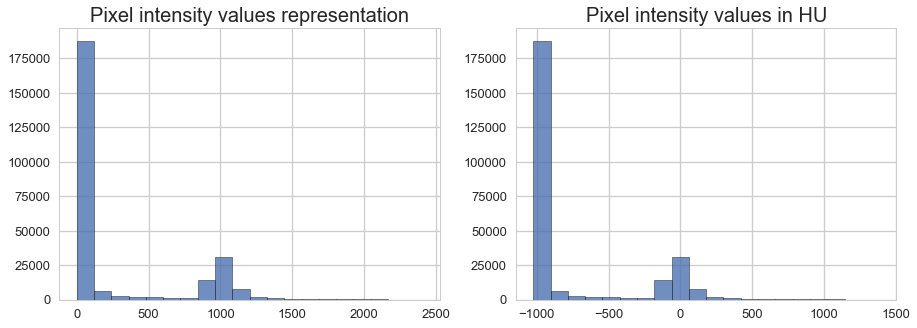

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='whitegrid')
%matplotlib inline

Img_pixel_array_HU = Img_pixel_array*Img_slope+Img_intercept  #Obtain HU intensities

#Lets plot distributions of pixel intensity values before and after transformation
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(Img_pixel_array.flatten(),bins=20,edgecolor='black', linewidth=0.5,alpha=0.8)
ax[0].set_title('Pixel intensity values representation',fontsize=20)
ax[1].hist(Img_pixel_array_HU.flatten(),bins=20,edgecolor='black', linewidth=0.5,alpha=0.8)
ax[1].set_title('Pixel intensity values in HU',fontsize=20)
plt.show()


Another library we can use for processing DICOM images is the SimpleITK (http://www.simpleitk.org/).
It uses a different way of storing the header metadata but it has more instruments for image processing and you don't need to do intensity values transformation manually, sitk applies it automaticly. However, pydicom faster then sitk, and when you need to process thousands of patients it might be a reasonable choice. 
In SimpleITK header metadata stored as a dictionary so you need to know a proper key to acess field you need.

In [6]:
#lets print Header metadata using sitk
img_slice_sitk = sitk.ReadImage(slice_path)
keys = img_slice_sitk.GetMetaDataKeys()
for key in keys:
    print('Key: ',key,'Value: ',img_slice_sitk.GetMetaData(key))

Key:  0008|0005 Value:  ISO_IR 100
Key:  0008|0008 Value:  ORIGINAL\PRIMARY\AXIAL\CT_SOM5 SPI
Key:  0008|0016 Value:  1.2.840.10008.5.1.4.1.1.2
Key:  0008|0018 Value:  1.3.6.1.4.1.32722.99.99.5914374636395993349296627281745948215
Key:  0008|0020 Value:  20080918
Key:  0008|0021 Value:  20080918
Key:  0008|0022 Value:  20080918
Key:  0008|0023 Value:  20080918
Key:  0008|0030 Value:  110915.625000 
Key:  0008|0031 Value:  121748.328000 
Key:  0008|0032 Value:  113840.421787 
Key:  0008|0033 Value:  113840.421787 
Key:  0008|0050 Value:  2819497684894126
Key:  0008|0060 Value:  CT
Key:  0008|0070 Value:  SIEMENS 
Key:  0008|0090 Value:    
Key:  0008|1090 Value:  Biograph 40 
Key:  0010|0010 Value:  2342949070
Key:  0010|0020 Value:  LUNG1-001 
Key:  0010|0030 Value:  
Key:  0010|0040 Value:  M 
Key:  0010|1010 Value:  083Y
Key:  0010|1030 Value:  72
Key:  0012|0062 Value:  YES 
Key:  0018|0015 Value:  LUNG
Key:  0018|0022 Value:  TM50PC2366
Key:  0018|0050 Value:  3 
Key:  0018|0060 Val

In [7]:
#Lets compare the time spend for obtaining the image array, pydicom vs SimpleITK

In [8]:
%%timeit
img_slice_sitk = sitk.ReadImage(slice_path)
img_slice_array = sitk.GetArrayFromImage(img_slice_sitk)

55.8 ms ± 301 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
%%timeit
slice_file = pydicom.read_file(slice_path)
Img_pixel_array_HU = slice_file.pixel_array*slice_file.RescaleSlope+slice_file.RescaleIntercept


5.52 ms ± 460 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


You might want to work with image with mm scale pixel representation and not the compressed representation, then we need to resize our image using pixel spacing values. Here we can use opencv library, its very powerfull and has lots of useful features (https://pypi.org/project/opencv-python/). 

In [10]:
import cv2
import numpy as np

In [11]:
img_slice_sitk = sitk.ReadImage(slice_path)
img_slice_array = sitk.GetArrayFromImage(img_slice_sitk)
print('Pixel array shape: ',img_slice_array.shape,'Pixel spacing: ',img_slice_sitk.GetSpacing())
new_shape = (int(img_slice_array.shape[1]*img_slice_sitk.GetSpacing()[0]),int(img_slice_array.shape[2]*img_slice_sitk.GetSpacing()[1]))

#sitk works with 2D images so lets remove the single channel dimension, moreover to be able to apply interpolation we need to
#ensure thet our dtype is float

img_slice_array = np.squeeze(img_slice_array)
img_slice_array = np.array(img_slice_array,np.float)
image_in_mm = cv2.resize(img_slice_array,new_shape,cv2.INTER_CUBIC)
print('Rescaled image ( with (1,1,1) mm pixel spacing) shape: ',image_in_mm.shape)

Pixel array shape:  (1, 512, 512) Pixel spacing:  (0.9765625, 0.9765625, 1.0)
Rescaled image ( with (1,1,1) mm pixel spacing) shape:  (500, 500)


In [12]:
#Having HU values for the pixel array we can simply filter the image by tresholding it or applying window filter

In [13]:
#Lets apply bone window for our image
bf_image = image_in_mm.copy()
bf_image[image_in_mm<100]=100

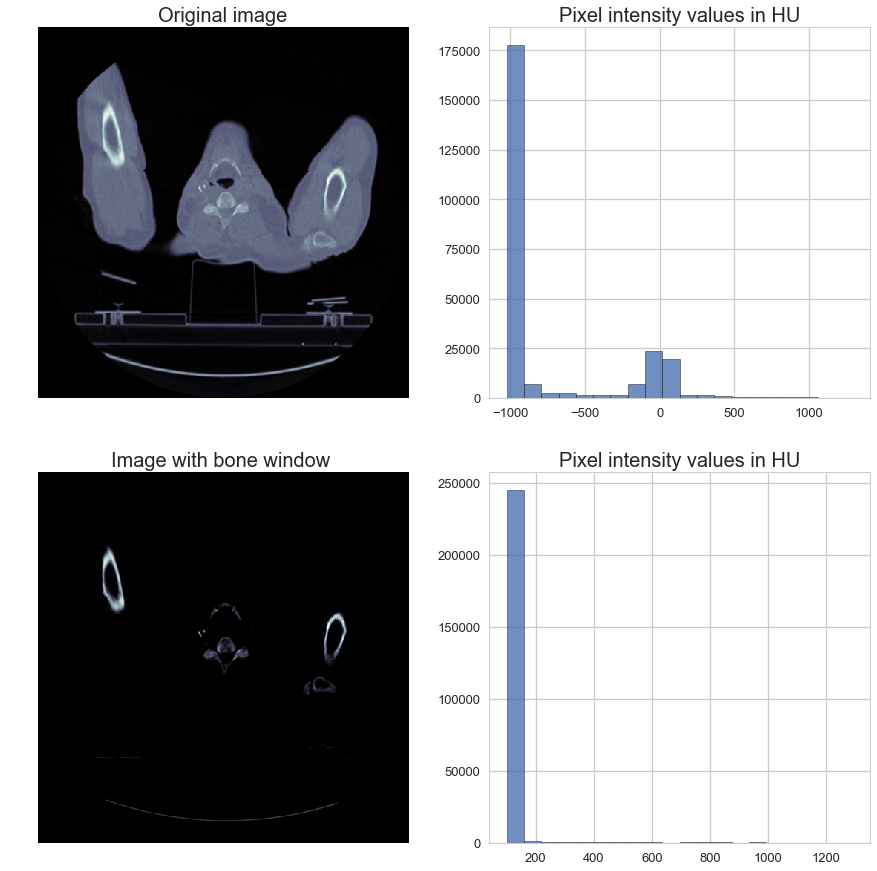

In [14]:
fig,ax = plt.subplots(2,2,figsize=(15,15))
ax[0,0].imshow(image_in_mm,cmap='bone')
ax[0,0].set_title('Original image',fontsize=20)
ax[0,0].axis('off')
ax[0,1].hist(image_in_mm.flatten(),bins=20,edgecolor='black', linewidth=0.5,alpha=0.8)
ax[0,1].set_title('Pixel intensity values in HU',fontsize=20)
ax[1,0].imshow(bf_image,cmap='bone')
ax[1,0].set_title('Image with bone window ',fontsize=20)
ax[1,0].axis('off')
ax[1,1].hist(bf_image.flatten(),bins=20,edgecolor='black', linewidth=0.5,alpha=0.8)
ax[1,1].set_title('Pixel intensity values in HU',fontsize=20)
plt.show()


As a next step lets obtain a 3D volume from patient dicom files.
Below is some useful functions for open and visualize 3D images.

In [15]:
import os
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage import measure, feature, morphology


def Parsing_dir(general_path):   #This function create a dictionary with paths to image data for every patient
    patients = next(os.walk(general_path))[1]
    print(len(patients),r' Patients found')
    Patient_dict={}
    dcm_files=[]
    for patient in patients:
        for root, dirs, files in os.walk(os.path.join(general_path,patient)):
            for file in files:
                if file.endswith('.dcm'):
                    dcm_files.append(os.path.join(root, file))
        for file in dcm_files:
            temp_file = pydicom.read_file(file, force=True)
            try:
                temp_data = temp_file.pixel_array
                Patient_dict[patient]=os.path.dirname(os.path.abspath(file))
            except:
                pass   
    return Patient_dict


def Create_volume(patient_path):   #Converts patient slices to volume
    slices=[]
    for file in os.listdir(patient_path):
        try:
            temp_file = pydicom.read_file(os.path.join(patient_path,file), force=True)
            try:
                temp_data = temp_file.pixel_array
                temp_file.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
                slices.append(temp_file)
            except:
                pass
        except:
            pass             
    try:
        slices.sort(key = lambda x: int(x.ImagePositionPatient[2]))
    except:
        print('Some problems with sorting scans')    
    volume = np.array(np.stack([sl.pixel_array for sl in slices]),np.float)
    try:
        intercept = slices[0].RescaleIntercept
        slope = slices[0].RescaleSlope
        volume = volume*slope+intercept
    except AttributeError:
        print('Some problems with restoring intensity values')  
    return volume   

#Function for resizing 3d volume using opencv library, image should have float dtype
def resize_3d_img(img,shape,interp = cv2.INTER_CUBIC):
    init_img = img.copy()
    temp_img = np.zeros((init_img.shape[0],shape[1],shape[2]))
    new_img = np.zeros(shape)
    for i in range(0,init_img.shape[0]):
        temp_img[i,...] = cv2.resize(init_img[i,...],dsize=(shape[2],shape[1]),interpolation = interp)   
    for j in range(0,shape[1]):
        new_img[:,j,:] = (cv2.resize(temp_img[:,j,:],dsize=(shape[2],shape[0]),interpolation = interp)) 
    return new_img

#Visualizing 3D image, quite slow 
def plot_3d(image, threshold=-300):
    p = image.transpose(2,1,0)
    verts, faces, normals, values = measure.marching_cubes_lewiner(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()    

In [16]:
#Find all patients in folder
Patient_dictionary = Parsing_dir(r'.\Test-patient (TCIA LUNG1)')

3  Patients found


In [21]:
#Create list of volumetric arrays for patients
Patient_volumes=[]
for patient in Patient_dictionary.keys():
    Patient_volumes.append(Create_volume(Patient_dictionary[patient])) 
    print(patient,' image shape is: ',Create_volume(Patient_dictionary[patient]).shape)

LUNG1-001  image shape is:  (134, 512, 512)
LUNG1-002  image shape is:  (111, 512, 512)
LUNG1-003  image shape is:  (107, 512, 512)


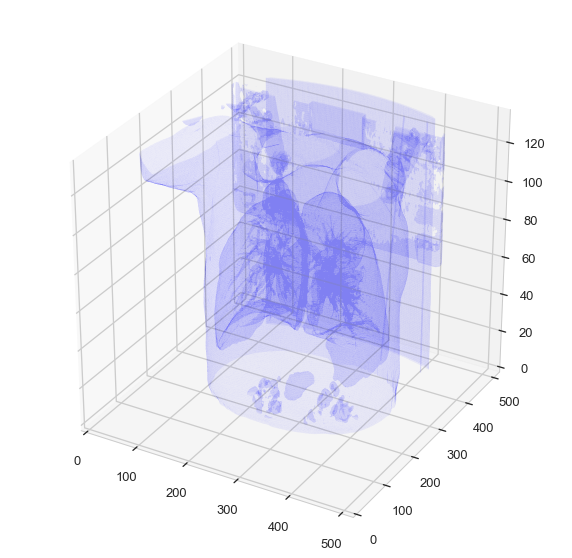

Wall time: 3min 40s


In [19]:
%%time
#depending on the threshold might be quite slow,because its create a surface using pixel values
plot_3d(Patient_volumes[0],-320)